## Burgers Equation

$$ \frac{\partial u}{\partial t} = - u \frac{\partial u}{\partial x} + \nu \frac{\partial^2 u}{\partial x^2} $$

In [60]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft 

## Initial function which we will use

In [61]:
def initial_condition(x):
    return -np.sin(np.pi*x)

#### Taking the initial conditions

In [62]:
Range_start = -1 #initial condition of where to start
Range_stop = 1 #Final point where we will stop
Range_length = Range_stop - Range_start # Will give the length of the condition
dx = 0.01 # Will define the minimum x difference
num_points = int(round(Range_length/dx) + 1) # Will give the mumber of points
x_range = np.linspace(Range_start,Range_stop,int(num_points)) # Will output the x values

nu = 0.01/np.pi # Defining the value of nu

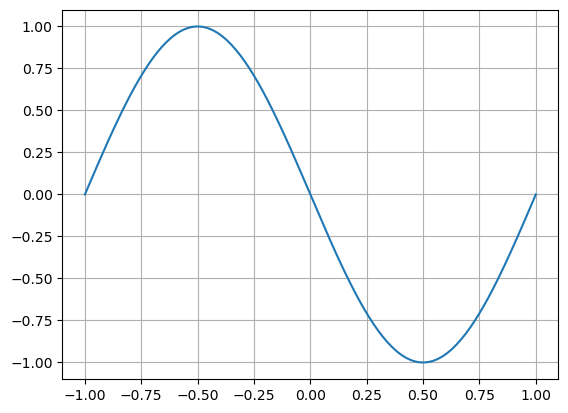

In [63]:
u_0 = initial_condition(x_range) # will give initial condition in the real space
plt.plot(x_range,u_0) # Plot for visualization
plt.grid()

##### Creating fft parameters

In [64]:
dt = 0.001 # time step value
t_max = 1 # Maximum time range
num_t_points = int(round(t_max)/dt + 1) # Number of points
t_range = np.linspace(0,t_max,int(num_t_points))

In [65]:
kappa = 2*np.pi*fft.fftfreq(num_points,d=dx)
#u = fft.fft(u_0)
#plt.plot(kappa,u.real)
#plt.xlim([-10,10])

In [66]:
def du_dt(u,time_range,kappa,nu):
    u_hat = fft.fft(u)
    fourier_du_dx = 1j*kappa*u_hat
    fourier_du2_dx2 = -(kappa**2)*u_hat

    real_du_dt = fft.ifft(fourier_du_dx)
    real_du2_dx2 = fft.ifft(fourier_du2_dx2)

    return (-u*real_du_dt + nu*real_du2_dx2).real

In [67]:
u_record = odeint(du_dt,u_0,t_range,args=(kappa,nu))
u_record[1,1]

0.031017368831988527

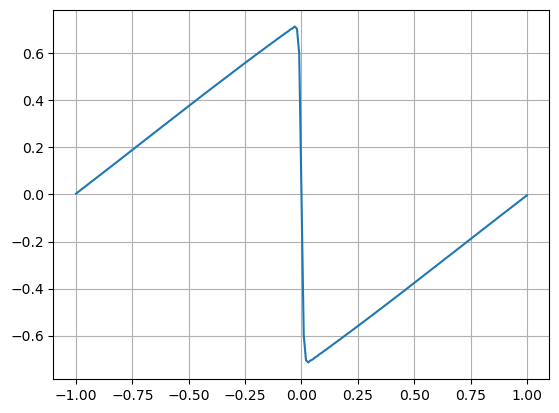

In [68]:
time_asked = int(round(1000*1))
plt.plot(x_range,u_record[time_asked,:])
plt.grid()

In [69]:
U_value_stack = u_record.reshape(-1,1)
x_range_stack = x_range.reshape(1,-1)
x_range_stack = np.tile(x_range_stack,(num_t_points,1)).flatten().reshape(-1,1)
time_range_stack = np.tile(t_range.reshape(-1,1),(1,num_points)).reshape(-1,1)
u0_value_stack = np.tile(u_0.reshape(1,-1),(len(x_range_stack),1))

In [70]:
Final_np_array = np.concatenate((u0_value_stack,x_range_stack,time_range_stack,U_value_stack),axis=1)
Final_np_array.shape

(201201, 204)

In [71]:
import pandas as pd

Final_df = pd.DataFrame(Final_np_array)
Final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,1.224647e-16,0.031411,0.062791,0.094108,0.125333,0.156434,0.187381,0.218143,0.24869,0.278991,...,-0.187381,-0.156434,-0.125333,-0.094108,-0.062791,-0.031411,-1.224647e-16,-1.00,0.0,1.224647e-16
1,1.224647e-16,0.031411,0.062791,0.094108,0.125333,0.156434,0.187381,0.218143,0.24869,0.278991,...,-0.187381,-0.156434,-0.125333,-0.094108,-0.062791,-0.031411,-1.224647e-16,-0.99,0.0,3.141076e-02
2,1.224647e-16,0.031411,0.062791,0.094108,0.125333,0.156434,0.187381,0.218143,0.24869,0.278991,...,-0.187381,-0.156434,-0.125333,-0.094108,-0.062791,-0.031411,-1.224647e-16,-0.98,0.0,6.279052e-02
3,1.224647e-16,0.031411,0.062791,0.094108,0.125333,0.156434,0.187381,0.218143,0.24869,0.278991,...,-0.187381,-0.156434,-0.125333,-0.094108,-0.062791,-0.031411,-1.224647e-16,-0.97,0.0,9.410831e-02
4,1.224647e-16,0.031411,0.062791,0.094108,0.125333,0.156434,0.187381,0.218143,0.24869,0.278991,...,-0.187381,-0.156434,-0.125333,-0.094108,-0.062791,-0.031411,-1.224647e-16,-0.96,0.0,1.253332e-01


In [72]:
Final_df.to_csv("minus_sin_pix.csv")